# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import re

from scipy.stats import normaltest
from scipy.stats import kruskal

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

## Deskripsi Dataset

<br> Title: TSA Claims
<br> Size: 13 kolom dan 204,267 baris
<br> TSA Claims Database merupakan data pengajuan klaim di bandara pada tahun 2002-2015. Dataset ini berisikan informasi tentang:

- Claim Number: Nomor klaim pelanggan
- Date Received: Tanggal klaim diterima
- Incident Date: Tanggal kejadian penyebab klaim
- Airport Code: Kode bandara kejadian
- Airport Name: Nama bandara kejadian
- Airline Name: Nama maskapai penerbangan yang terkait
- Claim Type: Jenis klaim yang diajukan
- Claim Site: Lokasi pengajuan klaim
- Item: Barang yang diklaim
- Claim Amount: Nominal klaim yang diajukan
- Status: Status klaim
- Close Amount: Nominal klaim yang diberikan
- Disposition: Penyelesaian klaim yang diajukan

<br> Source: [Kaggle](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)

## Load Dataset

In [2]:
df = pd.read_csv('tsa_claims.csv').reset_index(drop=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## Eksplorasi Dataset

### Informasi tentang Dataset (Kolom, Keterisian Data, Tipe Data)

In [3]:
df.info() #Memeriksa isi data (banyak nilai null dan tipe data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


### Data Duplikat

In [4]:
df[df['Claim Number'].duplicated()] #Mengecek data yang terduplikasi

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
186744,2013081805991,13-Jan-14,21-Dec-12,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,$0.00,Deny,NaN,NaN
186836,2013053003894,18-Apr-14,22-Apr-13,ACY,Atlantic City International,-,Motor Vehicle,Motor Vehicle,Baggage/Cases/Purses,$2;233.86,Settle,NaN,NaN
186837,2013081205863,24-Apr-14,2-Aug-13,ZZX,Non TSA Airport (motor vehicle),-,Personal Injury,Motor Vehicle,-,$20;000.00,Settle,NaN,NaN
186838,2013082906390,3-Jul-14,23-Jul-13,BNA,Nashville International,Southwest Airlines,Personal Injury,Checkpoint,Other,-,-,NaN,NaN
186842,2013103108490,22-May-14,26-Sep-13,ZZX,Non TSA Airport (motor vehicle),-,Personal Injury,Motor Vehicle,-,-,-,NaN,NaN
186844,2013121110011,21-Jul-14,15-May-13,JAX,Jacksonville International,-,Personal Injury,Checkpoint,-,-,-,NaN,NaN
186846,2013123010324,21-May-14,30-Nov-13,MCO,Orlando International Airport,Delta Air Lines,Personal Injury,Checkpoint,-,$0.00,Deny,NaN,NaN
196321,2013050203487,27-Feb-15,21-Jan-13,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,-,$0.00,Deny,NaN,NaN


Ada 9 data duplikat di dalam dataset

### Nilai Kosong (Null) pada Dataset

Untuk mempermudah melihat proporsi data kosong di setiap kolom data, maka jumlah null value akan dihitung sebagai persentase dari total semua data

In [5]:
# Memeriksa banyak nilai null dan persentasenya di dalam dataset
num = df.isna().sum()
res = pd.concat([num,num/len(df)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
Claim Number,0,0.000000
Date Received,263,0.128753
Incident Date,2183,1.068699
Airport Code,8524,4.172970
Airport Name,8524,4.172970
Airline Name,34374,16.827975
Claim Type,7913,3.873851
Claim Site,740,0.362271
Item,3966,1.941576
Claim Amount,4043,1.979272


Data kosong ditemukan pada hampir semua kolom, namun pada kolom 'Close Amount' dan 'Disposition' persentase data kosong ini mencapai 33.75% dan 35.69% dari total data sehingga diperlukan perlakuan untuk menangani data kosong ini karena tidak semua data null dapat dikeluarkan dari dataset.

### Ragam Nilai Dalam Setiap Kolom

In [6]:
pd.set_option('display.max_colwidth', -1)
cols =df.columns
res = []

for i in cols:
    res.append([i,df[i].unique()])

pd.DataFrame(res,columns=['Column Name','Unique Values'])

Column Name  \
0   Claim Number    
1   Date Received   
2   Incident Date   
3   Airport Code    
4   Airport Name    
5   Airline Name    
6   Claim Type      
7   Claim Site      
8   Item            
9   Claim Amount    
10  Status          
11  Close Amount    
12  Disposition     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Dari pengecekan ragam nilai pada setiap kolom ditemukan penulisan-penulisan data yang tidak konsisten atau salah, seperti:

- Ada kolom-kolom yang memiliki nilai berupa strip **(-)**
- Incident Date => Format penulisan data yang berbeda-beda, ada **4/15/2011, 19-09-2015, 20-MAR-0201 00:00, 11/21/2004 0:00, 12-08-2004  12:00:00 AM**
- Item => Data yang terdiri dari beberapa barang seperti **Clothing - Shoes; belts; accessories; etc.; Cosmetics - Perfume; toilet articles; medicines; soaps; etc.**
- Claim Amount => Ada penulisan data yang tidak lazim seperti **$3;250.04**
- Status => Data yang terlalu panjang seperti **Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.**
- Close Amount => Ada penulisan data yang tidak lazim seperti **$3;250.04**

# Data Cleaning

Dari proses eksplorasi dataset ditemukan permasalahan yang dapat membuat proses analisis data menjadi bias atau salah sehingga diperlukan proses _Data Cleaning_ untuk mengatasi permasalahan ini. Diantara permasalahan yang perlu diatasi terlebih dahulu adalah:

- Data duplikat
- Format penulisan data yang beragam atau tidak sesuai dengan konteks datanya
- Data kosong atau null value
- Konversi tipe data yang masih berupa object

## Mengatasi Data Duplikat

Dari pengecekan data duplikat, ditemukan ada 9 data yang terduplikasi sehingga data-data ini harus dihapus.

In [7]:
df.drop(df[df['Claim Number'].duplicated(keep='last')==True].index, inplace=True) #Menghapus data yang memiliki 'Claim Number' terduplikasi
df.reset_index(drop=True,inplace=True)

## Memperbaiki penulisan data

Ketidakkonsistenan format penulisan data dalam satu kolom yang sama membuat dataset TSA Claims ini memerlukan transformasi penulisan data untuk meningkatkan kualitas data dan memudahkan dalam pengolahan data untuk analisis, yang meliputi:

### 1. Mengganti data dengan nilai '-' menjadi null

In [8]:
cols = df.columns

for i in cols:
    df[i] = df[i].replace('-', np.nan) #Mengganti data yang berisi (-) dengan null

Proses ini akan menambah jumlah nilai null pada dataset

### 2. Menyeragamkan penulisan data pada kolom 'Incident Date'

Pada kolom 'Incident Date' ada data yang format penulisan nya adalah '03-SEP-0300 00:00'. Karena penulisan tersebut salah dan tidak dapat diinterpretasikan, maka data dengan format penulisan seperti itu akan diganti dengan data dari kolom 'Date Received'

In [9]:
df.reset_index(drop=True,inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [10]:
# Mengganti data pada kolom 'Incident Date' dengan format '11/26/2003 0:00' menjadi '26-11-2003'

df[['mm','dd','yyyy','time']] = df['Incident Date'].str.split('/| ', expand=True)
df['Incident Date F1'] = df['dd']+'-'+df['mm']+'-'+df['yyyy']

In [11]:
# Mengekstraksi data pada kolom 'Incident Date' dengan format 23-Nov-15 ke kolom baru

df['Incident Date F2'] = df['Incident Date'].str.extract(r'(\d{1,2}-\S{3}-\d{2,4})', expand=False).str.strip()

In [12]:
# Menggabung data 'Incident Date' dengan format 1&2 ke dalam kolom baru

df['Incident Date 2'] = df['Incident Date F1'].fillna(df['Incident Date F2']) 

In [13]:
# Mengganti data pada kolom 'Incident Date' dengan format 15-MAR-0209,15-FEB-1005 dengan data dari kolom 'Date Received'

df['Incident Date 3'] = np.where(df['Incident Date 2'].str.contains('-\S{3}-\d{4}')==True,df['Date Received'],df['Incident Date 2'])

In [14]:
df['Incident Date'] = df['Incident Date 3']

In [15]:
df.drop(columns=['dd','mm','yyyy','time','Incident Date F1','Incident Date F2','Incident Date 2','Incident Date 3'],inplace=True) #Menghapus kolom-kolom sementara yang sudah dibuat
df.reset_index(drop=True,inplace=True)

### 3. Menghilangkan simbol dolar '$' dan titik-koma ';' pada kolom 'Claim Amount' dan 'Close Amount'

Pada dua kolom ini, ada dua isu yang perlu ditangani:
- Simbol $ pada penulisan data, seperti $16.71
- Data yang tertulis dengan ; setelah simbol $, seperti $3;250.04

In [16]:
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '') #Menghapus simbol dolar pada kolom 'Claim Amount'
df['Claim Amount'] = df['Claim Amount'].str.replace(';', '') #Menghapus titik-koma pada kolom 'Claim Amount'
df['Close Amount'] = df['Close Amount'].str.replace('$', '') #Menghapus simbol dolar pada kolom 'Close Amount'
df['Close Amount'] = df['Close Amount'].str.replace(';', '') #Menghapus titik koma pada kolom 'Close Amount'

### 4. Menyederhanakan data pada kolom 'Item'

Di kolom item, informasi tentang barang yang diklaim tercatat dengan detail barang apa saja yang hilang/rusak dan deskripsi singkat tentang jenis barangnya. Akan tetapi informasi ini dapat disederhanakan dengan mengekstrak kata-kata kunci di awal kalimat yang dipisahkan oleh tanda strip (-) dan titik-koma (;)

In [17]:
df['Item'] = df['Item'].str.split(r"-|;", expand=True)[0]

### 5. Menyederhanakan data pada kolom 'Status'

Di dalam kolom status ada banyak bentuk penulisan, baik yang penulisannya berbeda namun makna nya sama seperti _Denied_ dan _deny_ ataupun yang secara interpretasi sama, seperti _In Review_ dan _In Litigation_ yang dapat dijadikan sama ke dalam variabel _In Process_.

In [18]:
#Mengekstrak penulisan status yang terlalu panjang dengan mengambil kata paling depannya

df['Status'] = df['Status'].str.split(r";", expand=True)[0]

In [19]:
#Merubah _Denied_ menjadi _Deny_

df['Status'] = df['Status'].str.replace('Denied', 'Deny')

In [20]:
#Merubah _Settled_ menjadi _Settle_

df['Status'] = df['Status'].str.replace('Settled', 'Settle')

In [21]:
#Merubah _Approved_ menjadi _Approve in Full_

df['Status'] = df['Status'].str.replace('Approved', 'Approve in Full')

Sedangkan data yang secara makna berarti dalam proses, seperti:
- 'In litigation',
- 'In review',
- 'Claim entered',
- 'Claim has been assigned for further investigation',
- 'Pending response from claimant

akan disamakan menjadi variabel baru: **In Process**

In [22]:
#Merubah data menjadi _In Process_

df['Status'] = df['Status'].str.replace('In litigation','In Process')
df['Status'] = df['Status'].str.replace('In review','In Process')
df['Status'] = df['Status'].str.replace('Claim entered','In Process')
df['Status'] = df['Status'].str.replace('Claim has been assigned for further investigation','In Process')
df['Status'] = df['Status'].str.replace('Pending response from claimant','In Process')

## Hasil

In [23]:
pd.set_option('display.max_colwidth', None)
cols =df.columns
res = []

for i in cols:
    res.append([i,df[i].unique()])

pd.DataFrame(res,columns=['Column Name','Unique Values'])

,Column Name,Unique Values
0,Claim Number,"[0909802M, 0202417M, 0202445M, 0909816M, 2005032379513, 2005032479636, 2007050124750, 12772, 14268, 2004102965797, 2005071188575, 2005070788431, 14460, 13334, 0616771L, 15242, 15324, 15361, 0616636L, 0714534M, 0616540L, 16410, 0616723L, 2004092763985, 16403, 0702564M, 16759, 0616777L, 15352, 14907, 17892, 17846, 17201, 2004050550501, 18170, 18202, 18193, 18222, 18171, 18274, 0616726L, 18315, 16961, 17666, 18141, 18301, 0909839M, 15542, 18065, 18109, 18098, 18101, 18394, 0616699L, 18438, 18620, 21003, 21021, 0616631L, 18221, 0616675L, 18804, 0616760L, 18917, 18919, 21134, 19009, 0616624L, 20887, 21013, 19029, 18966, 19133, 23663, 0616802L, 15769, 18181, 23623, 0702504M, 0714563M, 0616579L, 23284, 18386, 18908, 23278, 21111, 21254, 0714547M, 19239, 19039, 19078, 20938, 21052, 21053, 21054, 21253, 0616528L, 19229, 20937, 0616610L, ...]"
1,Date Received,"[4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Feb-02, 30-Apr-02, 20-Jun-02, 25-Jun-02, 6-Jul-02, 7-Jul-02, 8-Jul-02, 12-Jul-02, 15-Jul-02, 18-Jul-02, 22-Jul-02, 24-Jul-02, 5-Aug-02, 8-Aug-02, 12-Aug-02, 19-Aug-02, 21-Aug-02, 9-Sep-02, 11-Sep-02, 16-Sep-02, 18-Sep-02, 19-Sep-02, 20-Sep-02, 23-Sep-02, 24-Sep-02, 25-Sep-02, 26-Sep-02, 27-Sep-02, 30-Sep-02, 2-Oct-02, 5-Oct-02, 7-Oct-02, 8-Oct-02, 9-Oct-02, 10-Oct-02, 11-Oct-02, 15-Oct-02, 17-Oct-02, 18-Oct-02, 19-Oct-02, 21-Oct-02, 22-Oct-02, 23-Oct-02, 25-Oct-02, 28-Oct-02, 29-Oct-02, 31-Oct-02, 1-Nov-02, 4-Nov-02, 5-Nov-02, 6-Nov-02, 7-Nov-02, 8-Nov-02, 9-Nov-02, 12-Nov-02, 13-Nov-02, 14-Nov-02, 15-Nov-02, 16-Nov-02, 18-Nov-02, 19-Nov-02, 20-Nov-02, 21-Nov-02, 22-Nov-02, 24-Nov-02, 25-Nov-02, 26-Nov-02, 27-Nov-02, 29-Nov-02, 2-Dec-02, 3-Dec-02, 4-Dec-02, 5-Dec-02, 6-Dec-02, 9-Dec-02, 10-Dec-02, 11-Dec-02, 12-Dec-02, 13-Dec-02, 16-Dec-02, 17-Dec-02, 18-Dec-02, 19-Dec-02, 20-Dec-02, 21-Dec-02, 23-Dec-02, 24-Dec-02, 26-Dec-02, 27-Dec-02, 30-Dec-02, 31-Dec-02, 2-Jan-03, 3-Jan-03, 5-Jan-03, 6-Jan-03, 7-Jan-03, ...]"
2,Incident Date,"[12-12-2002, 16-1-2004, 26-11-2003, 6-1-2003, 5-2-2005, 17-2-2005, 26-4-2007, 9-5-2002, 16-6-2002, 4-5-2002, 23-6-2005, 17-6-2005, 12-6-2002, 4-6-2002, nan, 31-5-2002, 11-3-2002, 6-3-2002, 10-7-2002, 26-7-2002, 19-7-2002, 22-6-2002, 12-7-2002, 13-7-2002, 28-6-2002, 23-8-2002, 30-8-2002, 19-8-2002, 5-8-2002, 2-8-2002, 12-8-2002, 28-7-2002, 23-7-2002, 16-8-2002, 13-8-2002, 1-9-2002, 14-8-2002, 31-12-2002, 1-7-2002, 20-8-2002, 21-8-2002, 24-8-2002, 27-7-2002, 31-8-2002, 15-8-2002, 12-9-2002, 29-8-2002, 10-9-2002, 31-7-2002, 3-8-2002, 21-8-2003, 3-9-2002, 26-9-2002, 22-8-2002, 7-8-2002, 18-7-2002, 8-9-2002, 9-9-2002, 25-9-2002, 10-4-2002, 7-10-2002, 29-9-2002, 20-9-2002, 24-9-2002, 27-9-2002, 22-9-2002, 15-9-2002, 2-10-2002, 28-9-2002, 13-9-2002, 14-9-2002, 9-8-2002, 19-10-2002, 3-10-2002, 21-9-2002, 14-10-2002, 13-10-2002, 28-8-2002, 1-10-2002, 6-10-2002, 8-10-2002, 18-9-2002, 10-10-2002, 9-10-2002, 20-10-2002, 11-9-2002, 16-10-2002, 5-10-2002, 15-10-2002, 27-10-2002, 18-10-2002, 22-10-2002, 21-10-2002, 23-10-2002, 7-10-2004, 24-7-2002, 28-10-2002, 19-9-2002, 26-10-2002, 30-9-2002, ...]"
3,Airport Code,"[EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ATL, ORD, CLT, nan, SDF, RDU, BOS, PVD, CMH, MDW, BDL, JFK, DCA, BHM, TPA, CLE, COS, HOU, TSA, SAT, SYR, MOB, LAX, LGA, PIT, OAK, BNA, SLC, PBI, SMF, DTW, ORF, DFW, PSP, OKC, SAN, TOL, MSP, DEN, LAS, IAH, CVG, SJC, FNT, RIC, ELP, MEM, ABE, RSW, RNO, HNL, IAD, ABQ, PDX, ROC, SNA, AUS, MKE, PWM, FLL, LGB, ITO, GPT, BUR, LEX, JAX, TUL, MSO, TUS, BUF, BTR, ONT, MSY, DAB, DSM, BGM, CHA, CHS, JNU, MHT, IND, GEG, OMA, ISP, TYS, HSV, FWA, MDT, CLL, ALB, BGR, ...]"
4,Airport Name,"[Newark International Airport, Seattle-Tacoma International, Lambert St. Louis International, Miami International Airport, Orlando International Airport, Akron-Canton Regional, Philadelphia International Airport, Baltimore/Washington Intl Thurgood Marshall, Phoenix Sky Harbor International, Hartsfield-Jackson Atlanta International Airport, Chicago O'Hare Inter

Di tahap ini, format penulisan pada data sudah seragam pada setiap kolom nya sehingga bisa dilanjutkan dengan proses penangan tipe data dan data kosong.

## Convert Data Type

Untuk kepentingan eksplorasi data, maka tipe data pada dataset perlu disesuaikan tipe informasi nya seperti menjadi tipe numerik atau tanggal, karena pada tahap ini semua kolom masih bertipe string/object. Kolom-kolom yang perlu dilakukan konversi tipe data adalah:

- Date Received: string -> date
- Incident Date: string -> date
- Claim Amount: string -> numeric(float)
- Close Amount: string -> numeric(float)

In [24]:
df1 = df.copy() #Menduplikasi dataset df ke dalam variabel baru
df1['Date Received'] = pd.to_datetime(df1['Date Received'])
df1['Incident Date'] = pd.to_datetime(df1['Incident Date'])
df1['Claim Amount'] = pd.to_numeric(df1['Claim Amount'])
df1['Close Amount'] = pd.to_numeric(df1['Close Amount'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204258 entries, 0 to 204257
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204258 non-null  object        
 1   Date Received  203995 non-null  datetime64[ns]
 2   Incident Date  202075 non-null  datetime64[ns]
 3   Airport Code   195294 non-null  object        
 4   Airport Name   195294 non-null  object        
 5   Airline Name   165643 non-null  object        
 6   Claim Type     196063 non-null  object        
 7   Claim Site     203242 non-null  object        
 8   Item           195874 non-null  object        
 9   Claim Amount   187471 non-null  float64       
 10  Status         191509 non-null  object        
 11  Close Amount   135315 non-null  float64       
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


Setelah tipe data disesuaikan dengan konteks datanya, maka proses penghapusan dan pengisian data kosong dapat dilakukan

## Menghapus baris dengan nilai kosong

### Sebelum penghapusan baris dengan nilai kosong

In [25]:
num = df1.isna().sum()
res = pd.concat([num,num/len(df1)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
Claim Number,0,0.000000
Date Received,263,0.128759
Incident Date,2183,1.068746
Airport Code,8964,4.388567
Airport Name,8964,4.388567
Airline Name,38615,18.905012
Claim Type,8195,4.012083
Claim Site,1016,0.497410
Item,8384,4.104613
Claim Amount,16787,8.218528


Besarnya persentase data kosong pada dataset, bahkan pada kolom jumlah nilai null nya mencapai lebih dari 30%, maka data dengan nilai null tidak dapat dihapus begitu saja karena ini akan menghilangkan banyak data. Oleh sebab itu, diperlukan perlakukan lain untuk tetap menjaga kuantitas data namun tetap tidak mengorbankan kualitas data. Perikut adalah langkah-langkah yang akan dilakukan:

1. Menghapus data dengan kolom kosong lebih dari 6 dari 13 kolom yang ada
2. Mengisi nilai null pada setiap kolom dengan nilai tertentu

### 1. Menghapus baris dengan kolom kosong lebih dari 6

Untuk menjaga kemurnian data, sebelum dilakukan pengisian nilai yang kosong, maka data yang memiliki data kosong pada lebih dari 6 kolom akan dihapus dari dataset, karena ini berarti 50% lebih informasi dari data telah hilang.

In [26]:
df1 = df1.dropna(thresh=7) #Drop rows that have column with missing value more than 7 columns
df1 = df1.reset_index(drop=True) #Mengatur ulang indeks baris dan membuang kolom indeks baris yang lama

Memeriksa data null yang tersisa

In [27]:
# Memeriksa banyak nilai null dan persentasenya di dalam dataset
num = df1.isna().sum()
res = pd.concat([num,num/len(df1)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
Claim Number,0,0.000000
Date Received,124,0.061175
Incident Date,1230,0.606820
Airport Code,7473,3.686802
Airport Name,7473,3.686802
Airline Name,37134,18.320046
Claim Type,7030,3.468248
Claim Site,578,0.285156
Item,7931,3.912756
Claim Amount,15336,7.566010


### 2. Filling the missing values

Ada tiga pendekatan yang digunakan dalam melakukan pengisian data kosong. Urutan pendekatan ini menunjukkan prioritas perlakukan yang akan diberikan sehingga apabila pendekatan pertama tidak dapat diterapkan pada suatu kolom, maka akan digunakan pendekatan kedua terlebih dahulu sebelum akhirnya digunakan pendekatan ketiga.

1. Mengisi data dengan menggunakan informasi dari kolom lain yang terkait
2. Mengisi data dengan nilai dari pusat pengukuran data (measure of central tendency)
3. Mengisi data kosong dengan nilai baru yang menandakan bahwa data pada sel tersebut kosong, dalam analisis ini digunakan **Unknown** untuk data bertipe kategorikal dan **0** untuk data numerik


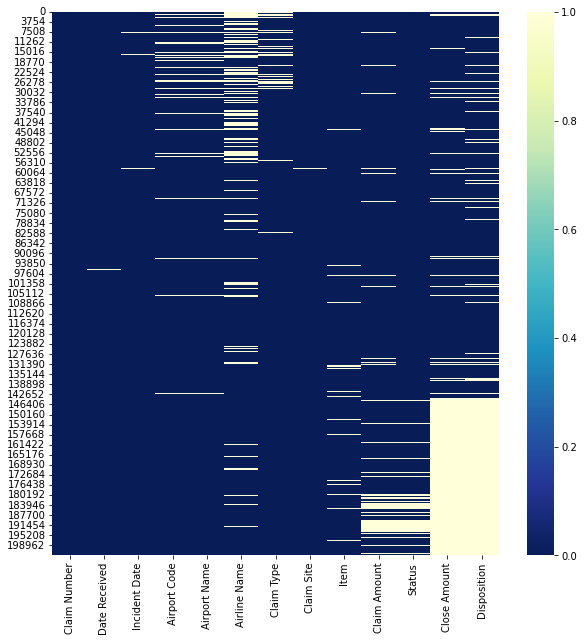

In [28]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df1.isna(),cmap='YlGnBu_r')
plt.show()

Dari heatmap ini keterkaitan pada sebaran data kosong antar-kolom dapat terlihat, seperti:

 - Kekosongan pada kolom 'Airport Code' dan 'Airport Name' saling terkait
 - Pada data dengan indeks >140,000 semua data pada kolom 'Close Amount' dan 'Disposition' hilang, namun pada ada sebagian data di 'Claim Amount' dan 'Status' terisi

#### 2.1 Kolom 'Incident Date' dan 'Date Received'

Karena persentase data kosong pada kedua kolom ini tidak terlalu banyak (kurang dari 1%) dan secara konteks kedua kolom ini saling terkait, maka data kosong pada kolom 'Date Received' dapat diisi dengan data pada kolom 'Date Incident', begitu pun sebaliknya.

In [29]:
df1['Date Received'].fillna(df1['Incident Date'],inplace=True) #Fill missing value in 'Date Received' column with value in 'Incident Date'

In [30]:
df1['Incident Date'].fillna(df1['Date Received'],inplace=True) #Fill missing value in 'Incident Date' column with value in 'Date Received'

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202696 entries, 0 to 202695
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   202696 non-null  object        
 1   Date Received  202693 non-null  datetime64[ns]
 2   Incident Date  202693 non-null  datetime64[ns]
 3   Airport Code   195223 non-null  object        
 4   Airport Name   195223 non-null  object        
 5   Airline Name   165562 non-null  object        
 6   Claim Type     195666 non-null  object        
 7   Claim Site     202118 non-null  object        
 8   Item           194765 non-null  object        
 9   Claim Amount   187360 non-null  float64       
 10  Status         190387 non-null  object        
 11  Close Amount   135098 non-null  float64       
 12  Disposition    131335 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.1+ MB


#### 2.2 Kolom 'Airport Code' dan 'Airport Name'

Kedua kolom ini saling tekait sehingga dapat diisi secara bersamaan dengan mengisikan nilai 'Unknown' untuk menandakan bahwa pada data hilang sehingga tidak diketahui informasinya.

In [32]:
df1['Airport Code'].fillna('Unknown',inplace=True)
df1['Airport Name'].fillna('Unknown',inplace=True)

#### 2.3 Kolom 'Airline Name'

Ada 18% data yang hilang pada kolom 'Airline Name', namun dari pemeriksaan didapatkan bahwa kolom ini dapat diisi dengan data 'Airline Name' dari baris lain yang memiliki nilai 'Incident Date' dan 'Airport Code' yang sama.

In [33]:
#Mengisi baris kosong pada 'Airplane Name' dengan data yang memiliki 'Incident Date' dan 'Airport Code' yang sama

df1['Airline Name'] = df1.groupby(['Incident Date','Airport Code'])['Airline Name'].bfill().ffill()

#### 2.4 Kolom 'Claim Type','Claim Site', dan 'Item'

Kekosongan data pada tiga kolom ini diisi dengan 'Unknown' untuk menandakan bahwa informasi pada baris ini hilang dan tidak diketahui

In [34]:
df1['Claim Type'].fillna('Unknown',inplace=True)
df1['Claim Site'].fillna('Unknown',inplace=True)
df1['Item'].fillna('Unknown',inplace=True)

#### 2.5 Kolom 'Claim Amount'

Secara kontekstual kolom 'Claim Amount' ini berkaitan dengan 'Close Amount', dengan asumsi bahwa apabila data pada baris ini memiliki status 'Approve in Full' atau 'Settled' maka nilai 'Claim Amount' adalah tidak akan lebih besar dari nilai 'Close Amount' nya sendiri sehingga data kosong 'Claim Amount' dapat diisi dengan nilai dari 'Close Amount'.

In [35]:
df1['Claim Amount'] = np.where((df1['Claim Amount'].isna()==True) & ((df1['Status'] == 'Approve in Full') | (df1['Status'] == 'Settle')),df1['Close Amount'],df1['Claim Amount'])

Sedangkan kolom 'Claim Amount' yang masih kosong dan berstatus selain 'Approve in Full' dan 'Settle' akan diisi dengan nilai median 'Claim Amount'.

In [36]:
df1['Claim Amount'].fillna(df1['Claim Amount'].median(),inplace=True)

#### 2.6 Kolom 'Status'

Secara konsep, kolom status dan disposition ini saling terkait, namun pada baris dengan kolom 'Status' kosong, kolom 'Disposition' juga kosong sehingga data akan diisi dengan 'Unknown' untuk menandakan bahwa data hilang.

In [37]:
df1['Status'].fillna('Unknown',inplace=True)

#### 2.7 Kolom 'Close Amount'

Data kosong pada kolom 'Close Amount' yang memiliki status 'Approve in Full' akan diisi dengan data dari 'Claim Amount' sedangkan yang statusnya 'Settle' akan diisi dengan nilai median 'Close Amount'

In [38]:
df1['Close Amount'] = np.where((df1['Close Amount'].isna()==True) & (df1['Status'] == 'Approve in Full'),df1['Claim Amount'],df1['Close Amount'])
df1['Close Amount'] = np.where((df1['Close Amount'].isna()==True) & (df1['Status'] == 'Settle'),df1['Close Amount'].median(),df1['Close Amount'])

Sementara kolom 'Close Amount' yang masih kosong dan berstatus selain 'Approve in Full' dan 'Settle' akan diisi dengan 0, dengan asumsi bahwa pengajuan klaim tidak disetujui.

In [39]:
df1['Close Amount'].fillna(0,inplace=True)

#### 2.8 Kolom 'Disposition'

Data kosong pada kolom disposition diisi dengan data dari kolom 'Status'

In [40]:
df1['Disposition'].fillna(df1['Status'],inplace=True)

#### Memeriksa banyak nilai null yang tersisa

In [41]:
# Memeriksa banyak nilai null dan persentasenya di dalam dataset
num = df1.isna().sum()
res = pd.concat([num,num/len(df1)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
Claim Number,0,0.00000
Date Received,3,0.00148
Incident Date,3,0.00148
Airport Code,0,0.00000
Airport Name,0,0.00000
Airline Name,0,0.00000
Claim Type,0,0.00000
Claim Site,0,0.00000
Item,0,0.00000
Claim Amount,0,0.00000


Setelah serangkaian proses penangan data kosong pada dataset, masih tersisa 3 data kosong pada kolom 'Date Received' dan 'Incident Date' yang dapat dikeluarkan saja dari dataset.

In [42]:
df1.dropna(inplace=True) #Membuang baris dengan data yang masih kosong

# Memeriksa banyak nilai null dan persentasenya di dalam dataset
num = df1.isna().sum()
res = pd.concat([num,num/len(df1)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
Claim Number,0,0.0
Date Received,0,0.0
Incident Date,0,0.0
Airport Code,0,0.0
Airport Name,0,0.0
Airline Name,0,0.0
Claim Type,0,0.0
Claim Site,0,0.0
Item,0,0.0
Claim Amount,0,0.0


Sekarang sudah tidak ada data kosong di dalam dataset dan analisis data sudah dapat dilakukan.

# Exploratory Data Analysis

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202693 entries, 0 to 202695
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   202693 non-null  object        
 1   Date Received  202693 non-null  datetime64[ns]
 2   Incident Date  202693 non-null  datetime64[ns]
 3   Airport Code   202693 non-null  object        
 4   Airport Name   202693 non-null  object        
 5   Airline Name   202693 non-null  object        
 6   Claim Type     202693 non-null  object        
 7   Claim Site     202693 non-null  object        
 8   Item           202693 non-null  object        
 9   Claim Amount   202693 non-null  float64       
 10  Status         202693 non-null  object        
 11  Close Amount   202693 non-null  float64       
 12  Disposition    202693 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 21.6+ MB


Data yang telah bersih kini sudah dapat digunakan untuk analisis, untuk menjawab pertanyaan-pertanyaan berikut:

1. Bandara dan maskapai manakah yang paling banyak menerima klaim dan bagaimana penyelesaiannya?
2. Barang apa dan dimana sajakah penumpang mengajukan klaim?
3. Berapa valuasi klaim di bandara sejak tahun 2002 hingga 2015 dan bagaimana perkembangannya?
4. Apa rekomendasi yang dapat diberikan untuk mengurangi frekuensi dan valuasi klaim?


Dengan demikian, fitur-fitur dan target yang akan digunakan dalam analisis ini adalah:

- Fitur:
    - Incident Date
    - Airport Code
    - Airline Name
    - Claim Type
    - Claim Site
    - Item
    - Claim Amount
    - Disposition
- Target:
    - Close Amount

## Mengambil kolom-kolom yang akan digunakan untuk analisis

In [44]:
data = df1[['Claim Number','Incident Date', 'Airport Code','Airline Name', 'Claim Type', 'Claim Site', 'Item','Claim Amount','Disposition','Close Amount']]

Selain ini, ada fitur lain yang perlu dipersiapkan dengan mengekstraksi data, yaitu membuat kolom 'Year' dari kolom 'Incident Date'

## Feature Extraction

In [45]:
data['Year'] = data['Incident Date'].dt.year

In [46]:
data.head()

,Claim Number,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Disposition,Close Amount,Year
0,0909802M,2002-12-12,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,2002
1,0202417M,2004-01-16,SEA,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,2004
2,0202445M,2003-11-26,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,2003
3,0909816M,2003-06-01,MIA,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,2003
4,2005032379513,2005-05-02,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approve in Full,84.79,2005


In [47]:
data['Year'].value_counts()

2004    29140
2003    25215
2005    23114
2006    18862
2007    18363
2008    15927
2010    12140
2009    11187
2011    10917
2012     9899
2013     9444
2014     8624
2015     7663
2002     2168
2001       15
2000       14
1996        1
Name: Year, dtype: int64

Di dalam dataset masih terdapat data untuk tahun yang berada di luar pengamatan, yaitu tahun 1996, 2000, dan 2001 sehingga data untuk ketiga tahun ini akan dikeluarkan dari dataset.

In [48]:
data = data[data['Year']>2001]

In [49]:
data['Year'].value_counts()

2004    29140
2003    25215
2005    23114
2006    18862
2007    18363
2008    15927
2010    12140
2009    11187
2011    10917
2012     9899
2013     9444
2014     8624
2015     7663
2002     2168
Name: Year, dtype: int64

## Deskripsi Analisis

Analisis pertama yang dilakukan adalah deskripsi analisis data untuk meilihat ukuran pemusatan dan persebaran data seperti mean, median, modus, quantile, dan banyaknya nilai unik pada variabel.

In [50]:
display(data.describe(), data.describe(include='object'))

,Claim Amount,Close Amount,Year
count,2.026630e+05,202663.000000,202663.000000
mean,1.488484e+07,75.953606,2007.404662
std,6.664008e+09,762.286565,3.611363
min,0.000000e+00,0.000000,2002.000000
25%,3.194500e+01,0.000000,2004.000000
50%,1.150000e+02,0.000000,2007.000000
75%,3.136850e+02,50.000000,2010.000000
max,3.000000e+12,250000.000000,2015.000000


,Claim Number,Airport Code,Airline Name,Claim Type,Claim Site,Item,Disposition
count,202663,202663,202663,202663,202663,202663,202663
unique,202663,464,317,11,6,143,8
top,0909802M,LAX,American Airlines,Passenger Property Loss,Checked Baggage,Other,Deny
freq,1,9594,23053,117634,159458,37315,96642


## Pemeriksaan Outliers Data

Outliers atau pencilan pada data dapat diketahui dengan mengilustrasikan data ke dalam diagram boxplot ataupun scatter plot.

### Boxplot

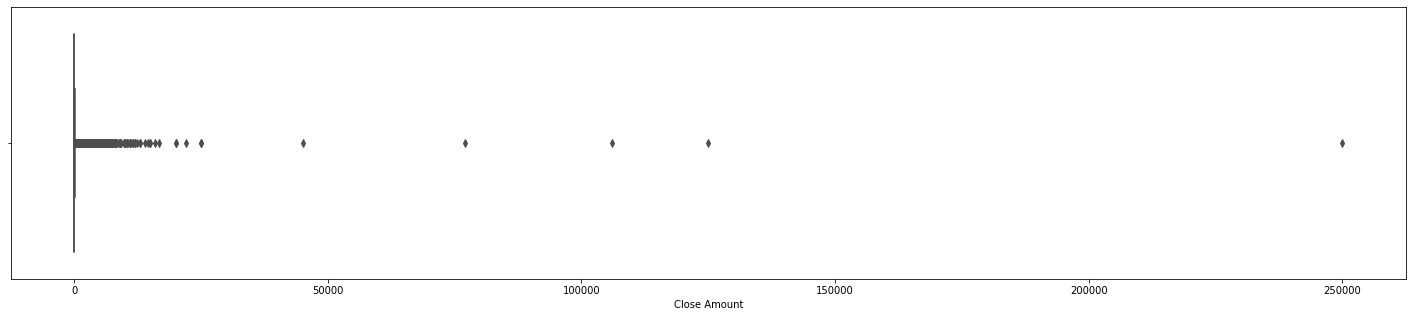

In [51]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['Close Amount'],palette='YlGnBu')
plt.show()

Dari plot data pada diagram boxplot, pencilan pada data ditemukan pada 'Close Amount' dengan nilai yang sangat besar, yang mencapai USD 250,000, sementara nilai median untuk data ini berada pada nilai USD 0

### Scatterplot

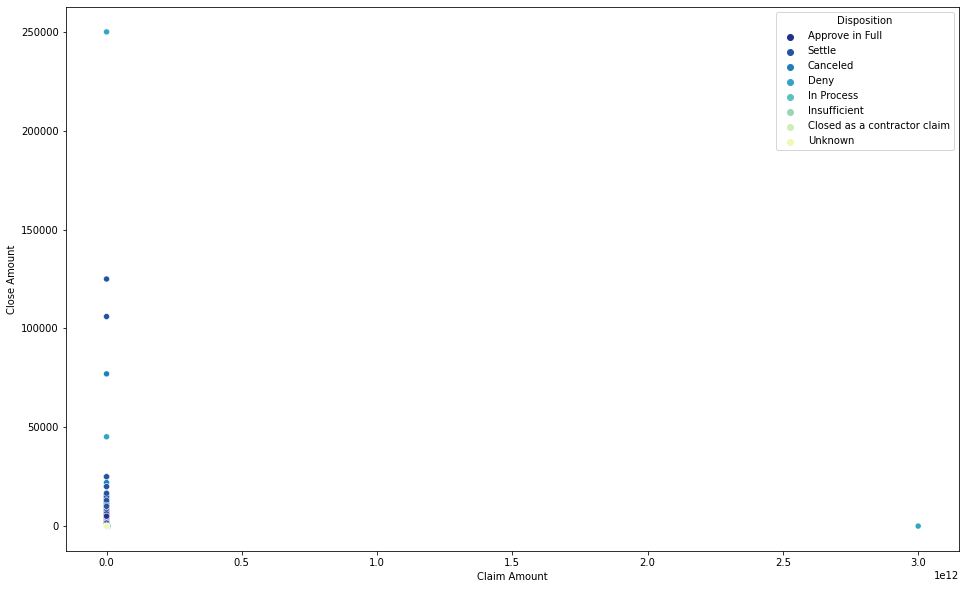

In [52]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=data, x='Claim Amount', y='Close Amount', hue='Disposition',palette='YlGnBu_r')
plt.show()

Sedangkan dari scatterplot 'Claim Amount' dengan 'Claim Amount' terlihat persebaran data pada 'Claim Amount' terkonsentrasi pada nilai kurang dari 10^11 dan 'Close Amount' pada nilai kurang dari 25,000 USD

Supaya data analisis bisa menjadi lebih akurat, maka outliers pada data dapat dihilangkan dengan melakukan filtering.

## Data Filtering

 Untuk melakukan filtering diperlukan batas ambang atas dan bawah untuk data yang akan dianalisis. Nilai ambang batas ini dapat ditentukan dengan menggunakan rumus:

- Batas Bawah = (Q1 - 1.5*(Q3 - Q1))
- Batas Atas = (Q3 + 1.5*(Q3 - Q1))

In [53]:
q3_claim = np.percentile(data['Claim Amount'], 75)
q1_claim = np.percentile(data['Claim Amount'], 25)

bb_claim = q1_claim - (1.5*(q3_claim-q1_claim))
ba_claim = q3_claim + (1.5*(q3_claim-q1_claim))

print('Untuk Claim Amount batas bawah = {} dan batas atas = {}'.format(bb_claim,ba_claim))

Untuk Claim Amount batas bawah = -390.665 dan batas atas = 736.2950000000001


In [54]:
q3_close = np.percentile(data['Close Amount'], 75)
q1_close = np.percentile(data['Close Amount'], 25)

bb_close = q1_close - (1.5*(q3_close-q1_close))
ba_close = q3_close + (1.5*(q3_close-q1_close))

print('Untuk close Amount batas bawah = {} dan batas atas = {}'.format(bb_close,ba_close))

Untuk close Amount batas bawah = -75.0 dan batas atas = 125.0


Karena nilai batas bawah 'Claim Amount' dan 'Close Amount' adalah negatif sementara tidak ada nilai negatif dalam data maka filtering dataset nya hanya dilakukan untuk batas atas saja.

In [55]:
data1 = data[(data['Claim Amount'] <= ba_claim) & (data['Close Amount'] <= ba_close)]
data1

,Claim Number,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Disposition,Close Amount,Year
1,0202417M,2004-01-16,SEA,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,2004
3,0909816M,2003-06-01,MIA,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,2003
4,2005032379513,2005-05-02,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approve in Full,84.79,2005
6,2007050124750,2007-04-26,PHL,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approve in Full,106.52,2007
7,12772,2002-09-05,BWI,Southwest Airlines,Unknown,Checkpoint,Clothing,75.00,Approve in Full,75.00,2002
...,...,...,...,...,...,...,...,...,...,...,...
202691,2015112327099,2014-11-12,ZZZ,American Airlines,Personal Injury,Motor Vehicle,Unknown,115.00,Unknown,0.00,2014
202692,2015041721983,2015-04-01,Unknown,British Airways,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.00,2015
202693,2015102626275,2015-08-08,Unknown,USAir,Passenger Property Loss,Checked Baggage,Jewelry & Watches,115.00,Unknown,0.00,2015
202694,2015101926087,2015-08-21,Unknown,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.00,2015


In [56]:
remain_data = len(data1)/len(data)

print('Data yang tersisa setelah filtering adalah {}%'.format(remain_data*100))

Data yang tersisa setelah filtering adalah 77.6801882928803%


<br>Namun, proses ini akan menghilangkan banyak sekali data, hingga lebih dari 22% nya. Oleh sebab itu, batas ambang yang akan diterapkan pada proses seleksi ini didasarkan pada pengamatan visual pada digram scatterplot 'Close Amount' dengan 'Claim Amount', sebagai berikut:

- Claim Amount < 100,000
- Close Amount < 10,000

In [57]:
#Menyeleksi data yang berada dalam rentang nilai batas atas dan batas bawah

data = data[(data['Claim Amount'] <= 50000) & (data['Close Amount'] <= 5000)] 
data.reset_index(drop=True)

,Claim Number,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Disposition,Close Amount,Year
0,0909802M,2002-12-12,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,2002
1,0202417M,2004-01-16,SEA,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,2004
2,0202445M,2003-11-26,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,2003
3,0909816M,2003-06-01,MIA,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,2003
4,2005032379513,2005-05-02,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approve in Full,84.79,2005
...,...,...,...,...,...,...,...,...,...,...,...
202255,2015112327099,2014-11-12,ZZZ,American Airlines,Personal Injury,Motor Vehicle,Unknown,115.00,Unknown,0.00,2014
202256,2015041721983,2015-04-01,Unknown,British Airways,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.00,2015
202257,2015102626275,2015-08-08,Unknown,USAir,Passenger Property Loss,Checked Baggage,Jewelry & Watches,115.00,Unknown,0.00,2015
202258,2015101926087,2015-08-21,Unknown,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,115.00,Unknown,0.00,2015


Filtering dengan nilai ambang batas atas 100,000 dan 10,000 untuk Claim Amount dan Close Amount ini telah menyaring 0.98% data, yaitu data dengan nilai yang ekstrim. Dataset yang telah melewati proses filtering inilah yang akan dianalisis untuk mendapatkan informasi atau insight yang berguna.

## Analisis Data

### Statistika Deskriptif

In [58]:
display(data.describe(), data.describe(include='object'))

,Claim Amount,Close Amount,Year
count,202260.000000,202260.000000,202260.000000
mean,431.084211,67.949639,2007.408899
std,1566.687891,222.115069,3.612353
min,0.000000,0.000000,2002.000000
25%,31.790000,0.000000,2004.000000
50%,115.000000,0.000000,2007.000000
75%,310.000000,50.000000,2010.000000
max,50000.000000,5000.000000,2015.000000


,Claim Number,Airport Code,Airline Name,Claim Type,Claim Site,Item,Disposition
count,202260,202260,202260,202260,202260,202260,202260
unique,202260,464,317,11,6,143,8
top,0909802M,LAX,American Airlines,Passenger Property Loss,Checked Baggage,Other,Deny
freq,1,9571,23000,117537,159354,37242,96418


Dari analisis deskriptif dataset dapat dilihat bahwa klaim paling banyak ditujukan kepada bandara **LAX** dan maskapai **American Airlines**, dengan klaim terbanyak untuk **kehilangan barang** dan mayoritas pengajuan dilakukan di lokasi **pengecekan bagasi**. Sedangkan frekuensi penyelesaian yang paling banyak adalah _Deny_ dengan 96,418 klaim.

### Normalitas Data

Karena variabel dependen / target pada analisis ini adalah kolom 'Close Amount' maka distribusi datanya perlu diperiksa terlebih dahulu untuk menentukan metode-metode analisis yang akan digunakan.

In [59]:
stats, pval=normaltest(data['Close Amount'])
print('P-Value: ',pval)
if pval > 0.05:
    print('Terima H0, data terdistribusi normal')
else:
    print('Tolak H0, data tidak terdistribusi normal')

P-Value:  0.0
Tolak H0, data tidak terdistribusi normal


Hasil Uji normalitas data menunjukkan bahwa data tidak terdistribusi normal sehingga untuk memeriksa korelasi 'Close Amount' dengan 'Claim Amount' diperlukan metode non parametrik _spearman_

### Uji Korelasi

Uji korelasi ini dilakukan untuk melihat keterkaitan nilai klaim yang diajukan dengan nilai klaim yang disetujui untuk diberikan.

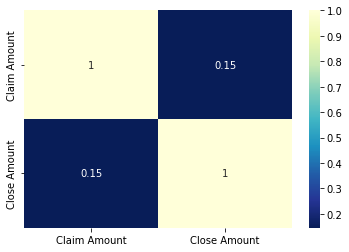

In [60]:
sns.heatmap(data[['Claim Amount','Close Amount']].corr(method='spearman'),cmap='YlGnBu_r',annot=True)
plt.show()

Hasil uji korelasinya menunjukkan hubungan yang lemah antara besar nilai klaim yang diajukan dengan yang disetujui, yang berarti besar nilai klaim yang disetujui untuk diberikan tidak ditentukan oleh besar nilai claim yang diajukan.

### Uji Kruskal-Walis

Untuk memeriksa nilai median Close Amount pada setiap tahun maka diperlukan metode Kruskal-Walis Test.

In [61]:
stat,pval = kruskal(data[data['Year']==2003]['Close Amount'],
                    data[data['Year']==2004]['Close Amount'],
                    data[data['Year']==2005]['Close Amount'],
                    data[data['Year']==2006]['Close Amount'],
                    data[data['Year']==2007]['Close Amount'],
                    data[data['Year']==2008]['Close Amount'],
                    data[data['Year']==2009]['Close Amount'],
                    data[data['Year']==2010]['Close Amount'],
                    data[data['Year']==2011]['Close Amount'],
                    data[data['Year']==2012]['Close Amount'],
                    data[data['Year']==2013]['Close Amount'],
                    data[data['Year']==2014]['Close Amount'],
                    data[data['Year']==2015]['Close Amount'])

print('p-Value: ',pval)
if pval > 0.05:
        print('H0 Accepted, median dari Close Amount untuk setiap tahun adalah sama')
else:
        print('H0 Rejected, median dari Close Amount untuk setiap tahun ada yang tidak sama')

p-Value:  0.0
H0 Rejected, median dari Close Amount untuk setiap tahun ada yang tidak sama


Ini dibuktikan dengan perhitungan nilai median Close Amount untuk setiap tahun dari 2003-2015.

In [62]:
data.groupby('Year')[['Close Amount']].median()

,Close Amount
Year,
2002,30.00
2003,35.00
2004,26.24
2005,0.00
2006,0.00
2007,0.00
2008,0.00
2009,0.00
2010,0.00


Banyaknya penyelesaian klaim dengan _Deny_ membuat median dari biaya penyelesaian klaim bernilai 0 USD sejak tahun 2005-2015.

# Data Visualisation

Untuk kepentingan analisis dan membantu dalam memahami informasi di dalam dataset, maka dataset akan diilustrasikan ke dalam berbagai macam diagram sesuai dengan kebutuhannya. Di bawah ini adalah plot diagram boxplot untuk melihat distribusi data pada kolom 'Close Amount' setelah proses filtering.

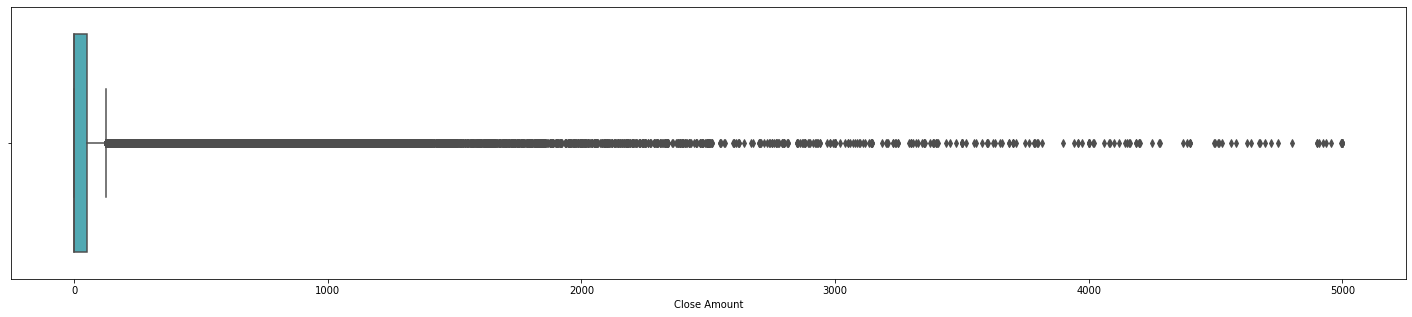

In [63]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['Close Amount'],palette='YlGnBu')
plt.show()

Sedangkan distribusi untuk setiap tahunnya diilustrasikan oleh diagram di bawah ini.

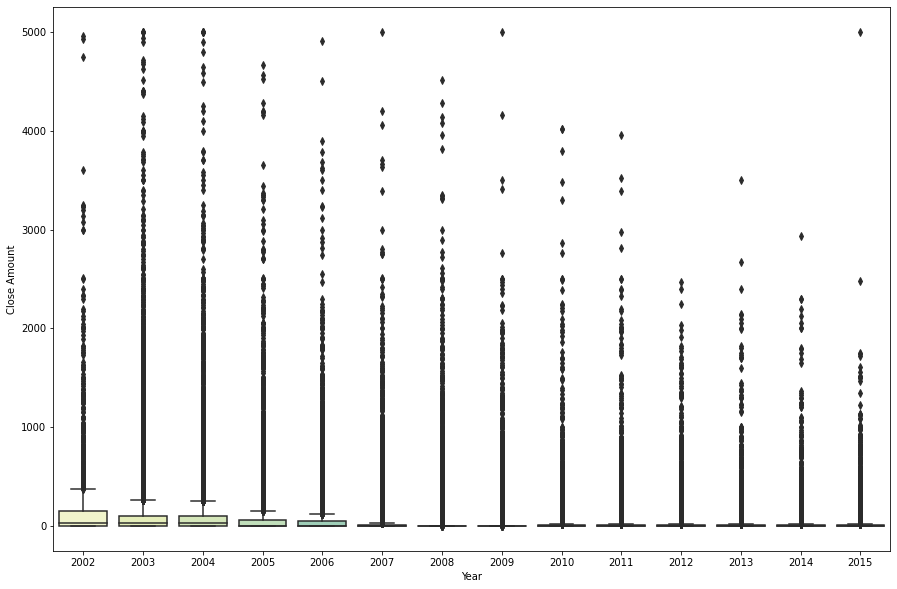

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Year',y='Close Amount',data=data, palette='YlGnBu')
plt.show()

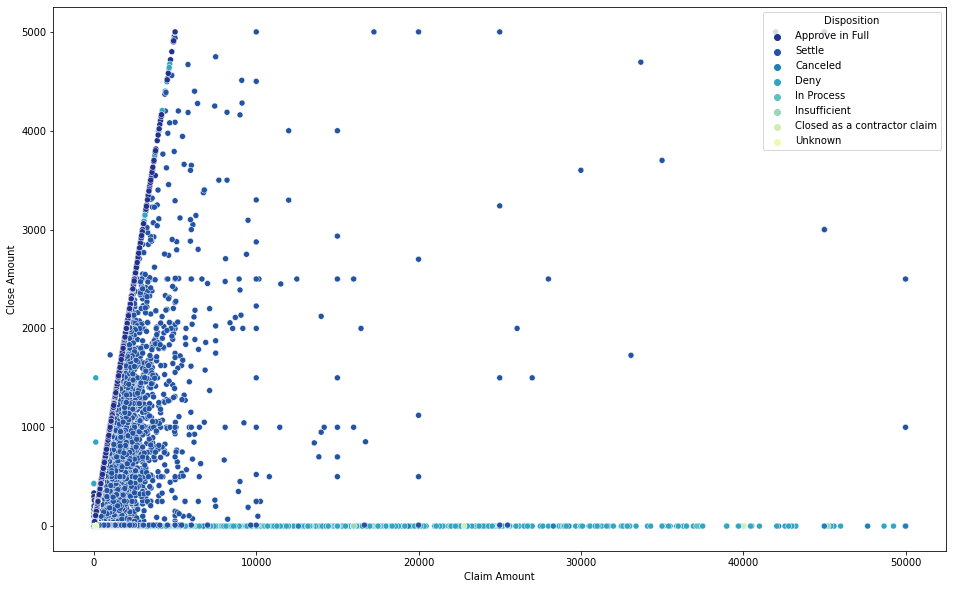

In [65]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=data, x='Claim Amount', y='Close Amount', hue='Disposition',palette='YlGnBu_r')
plt.show()

## 1. Maskapai dan bandara mana yang paling banyak menerima klaim? yang paling banyak menyetujui pemberian klaim?

In [66]:
data1 = data.groupby(['Airport Code'])['Claim Number'].count().sort_values(ascending=False)
data2 = data.groupby(['Airline Name'])['Claim Number'].count().sort_values(ascending=False)

In [67]:
fig = go.Figure(data=[
                        go.Bar(name='Bandara',x=data1.index,y=data1.values),
                        go.Bar(name='Maskapai',x=data2.index,y=data2.values)
                    ])

fig.update_layout(updatemenus=[
                                dict(type="buttons",direction="left",buttons=list([
                                    dict(label="Both",method="update",args=[{"visible": [True, True]},{"title": "Bandara dan Maskapai"}]),
                                    dict(label="Bandara",method="update",args=[{"visible": [True, False]},{"title": "Bandara"}]),
                                    dict(label="Maskapai",method="update",args=[{"visible": [False, True]},{"title": "Maskapai"}]),
                                    ]),
                                )
                                ])
fig.show()

**Interpretasi**

- Bandara yang paling banyak menerima klaim adalah LAX dengan jumlah lebih dari 9571 pengaduan sejak tahun 2002 hingga 2015.
- Maskapai yang paling banyak menerima klaim adalah American Airlines dengan jumlah klaim 23,000 pengaduan dari tahun 2002-2015

## 2. Apa saja klaim yang diterima? dimana lokasi pengajuannya? dan bagaimana penyelesaiaannya?

In [68]:
fig = px.treemap(data, path=['Claim Type','Claim Site','Disposition'],values='Close Amount',color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

**Interpretasi**

- Berdasarkan total nilai klaim yang diberikan, TSA paling banyak menerima klaim kehilangan dan kerusakan barang yang disampaikan di checked baggage dan checkpoint
- Untuk kerusakan properti, persentase penyelesaiannya paling banyak adalah dengan pemberian klaim secara full, sedangkan untuk kehilangan barang hanya pengajuan yang dilakukan di checkpoint yang diberikan dalan jumlah penuh.
- Selain kehilangan dan kerusakan properti ada juga klaim untuk personal injury, kendaraan bermotor, pencurian, dan kehilangan pegawai.

Visualisasi selanjutnya akan dilakukan di Tableau. Oleh karena itu, dataset akan dieksport ke dalam format .csv terlebih dahulu

# Export Dataset

Data yang sudah dibersihkan dieksport ke dalam format .csv untuk analisis lebih lanjut menggunakan Tableau

In [69]:
data.to_csv('D:\Purwadhika\Capstone Project Modul 2\TSA Claims Ready.csv') 

# Kesimpulan


1. Dari tahun 2002-2015 tercatat ada 202,260 pengajuan klaim yang diterima oleh petugas bandara di seluruh dunia, dengan jumlah pengajuan paling banyak pada tahun 2004 sebanyak 29,099 klaim.
2. Bandara yang paling banyak menerima klaim adalah LAX dengan jumlah 9,571 klaim.
3. Sedangkan maskapai yang paling banyak menerima klaim adalah American Airlines dengan jumlah 23,000.
4. Pengajuan-pengajuan klaim tersebut paling banyak terkait dengan kehilangan properti dan diajukan di pengecekan bagasi.
5. Secara keseluruhan, frekuensi pengajuan klaim terus mengalami penurunan meskipun pada tahun 2004 jumlahnya sempat meningkat sehingga menyebabkan claim amount dan close amount nya juga meningkat.
6. Akan tetapi, penurunan jumlah klaim secara signifikan pada tahun 2010 meningkatkan closing rate (Rata-rata penyelesaian tagihan claim) nya dari kisaran 7-25% pada tahun-tahun sebelumnya menjadi >40% pada tahun-tahun setelahnya.

# Rekomendasi

1. Untuk mengurangi frekuensi kejadian yang menyababkan klaim, yang dapat berdampak pada kerugian yang harus ditanggung maskapai dan bandara, maka maskapai dan bandara dapat meningkatkan keamanan penanganan barang penumpang sejak check-in hingga pengambilan bagasi supaya peluang kerusakan dan kehilangan barang penumpang dapat berkurang.
2. Selain itu, maskapai/bandara dapat juga mengatasi masalah ini dengan menyediakan asuransi perjalanan yang dapat melindungi isi bagasi penumpang yang tidak terbatas pada barang berharga seperti perhiasan, komputer, kamera, mata uang, dsb saja tapi juga mencakup perlindungan untuk pakaian, tas, peralatan olahraga, peralatan musik, atau dekorasi rumah juga.
3. Sementara layanan pengaduan klaim sebaiknya difokuskan pada dua titik saja, yaitu di _Checked Baggage_ dan _Checkpoint_, supaya pelayanan yang diberikan kepada penumpang dapat maksimal sehingga apabila ada kejadian yang menyebabkan klaim, penumpang mendapatkan penyelasaian yang memuaskan seperti _Approval In Full_ dan mengurangi peluang pengajuan _Deny_ akibat kurang bukti/informasi.